
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Recommender Systems

By : Samaher Alharbi , Hanan Almohammadi , Nesreen Alqhatani

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
<li><span><a href="#Introduction" ><span class="toc-item-num">&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item">

<li><span><a href="#Datasets-Description" ><span class="toc-item-num">&nbsp;&nbsp;</span>Dataset description</a></span>
    
<li><span><a href="#Executive-Summary:" ><span class="toc-item-num">&nbsp;&nbsp;</span>Executive Summary</a></span></li>
<li><span><a href="#Step1:--Problem-Statment" ><span class="toc-item-num">&nbsp;&nbsp;</span>Problem Statment</a></span></li></ul></li>

<li><span><a href="#Importing-the-Libraries" ><span class="toc-item-num">&nbsp;&nbsp;</span>Importing the Libraries</a></span>

<li><span><a href="#Step-2:-Data-Wrangling" ><span class="toc-item-num">&nbsp;&nbsp;</span>Data Wrangling</a></span>
<li><span><a href="#Step-3:-Data-Exploration" ><span class="toc-item-num">&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item">

    
</ul></li>
    

<li><span><a href="#Step-5:--Modeling" ><span class="toc-item-num">&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item">
<li><span><a href="#Nearest-Neighbors-Model-:" ><span class="toc-item-num">&nbsp;&nbsp;</span>Nearest Neighbors Model:</a></span>
<li><span><a href="#K-Neighbors-Classifier-Model-:" ><span class="toc-item-num">&nbsp;&nbsp;</span>K-Neighbors Classifier Model:</a></span> 
<li><span><a href="#Conclusion-and-Recommendations-:" ><span class="toc-item-num">&nbsp;&nbsp;</span>Conclusion and Recommendations</a></span></li></div>

# Introduction 


## Datasets Description 
The dataset contains all games for PlayStation 4: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|game|object|game|Contains the games name| 
|score|int|game|Contains maximum TrueTraphy score|
|leaderbord|float|game|Contains Game Leaderboard ratio|
|gamers|int|game|Contains the number of gamers plying this game in truetrophies website|
|comp_perc|float|game|Contains percentage of how many gamer complete this game|
|rating|float|game|Contains a rating from people who play this game by out of 5|
|url|object|game|Contains URL that have more information about each game|
|min_comp_time|str|game|Contains maximum estimated time to unlock all trophies|
|max_comp_time|int|game|Contains a rating from people who play this game by out of 5|


## Executive Summary:

[ps4-games](https://www.kaggle.com/ww1234/ps4-games)
The dataset comes from a Kaggle page named “ps4-games: video games Dataset from truetrophies website”.This dataset include all games for PlayStation 4 for the present.It comes from from truetrophies website contains 1584 games information and 10 features about games information such as games name and other details like score ,rating for each game etc.


## Step1:  Problem Statment

This project we are aims to build a Content-based recommender system based on games and the similarities between them. We will implement two algorithms from sklearn neighbors library the first one is Nearest Neighbors which is unsupervised machine learning algorithm to find the most similar games based-on gamers, comp_perc, rating, min_comp_time and max_comp_time. The second one is K-Neighbors Classifier which is supervised algorithm to find the most similar games based-on gamers, min_comp_time and max_comp_time.



## Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
 
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report
! pip install plotly

In [2]:
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)


## Step 2: Data Wrangling

---

In [3]:
from google.colab import drive
drive.mount('/content/drive')
# import pickle
DATA_PATH = "/content/drive/MyDrive/DSI8-project/project-4/"
infile = open(DATA_PATH+'games_data.csv','rb')
game = pd.read_csv(infile)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# game=pd.read_csv('./games_data.csv')

In [5]:
game.drop(columns='Unnamed: 0',inplace=True)


## Step 3: Data Exploration

In [6]:
game.dtypes


game              object
score              int64
leaderbord       float64
gamers             int64
comp_perc        float64
rating           float64
url               object
min_comp_time      int64
max_comp_time      int64
dtype: object

In [7]:
game.describe()

,score,leaderbord,gamers,comp_perc,rating,min_comp_time,max_comp_time
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,1894.984217,1.583971,18589.357323,49.020455,3.095455,16.231061,25.275884
std,1389.680978,0.748916,33676.397335,35.220544,0.973732,28.020810,70.424345
min,189.000000,1.000000,60.000000,0.000000,0.500000,0.000000,1.000000
25%,1313.000000,1.050000,1141.000000,14.200000,2.400000,0.000000,1.000000
50%,1458.500000,1.300000,3909.500000,45.600000,3.300000,5.000000,6.000000
75%,2419.250000,1.880000,18920.500000,86.525000,3.900000,20.000000,25.000000
max,12017.000000,7.380000,245220.000000,99.600000,5.000000,200.000000,700.000000


In [8]:
game.head()

,game,score,leaderbord,gamers,comp_perc,rating,url,min_comp_time,max_comp_time
0,A Boy and His Blob,638,2.02,2194,16.5,3.2,https://www.truetrophies.com/game/A-Boy-and-Hi...,15,20
1,A Hat in Time,1992,1.53,7062,35.9,4.2,https://www.truetrophies.com/game/A-Hat-in-Tim...,15,20
2,A Hero and a Garden,1364,1.01,503,97.6,5.0,https://www.truetrophies.com/game/A-Hero-and-a...,0,1
3,A Hero and a Garden (EU),1363,1.01,581,97.8,2.9,https://www.truetrophies.com/game/A-Hero-and-a...,0,1
4,A King's Tale: Final Fantasy XV,637,2.02,21914,14.1,3.3,https://www.truetrophies.com/game/A-Kings-Tale...,4,5


In [9]:
game.shape

(1584, 9)

## EDA part: 

Text(0.5, 1.0, 'Game data')

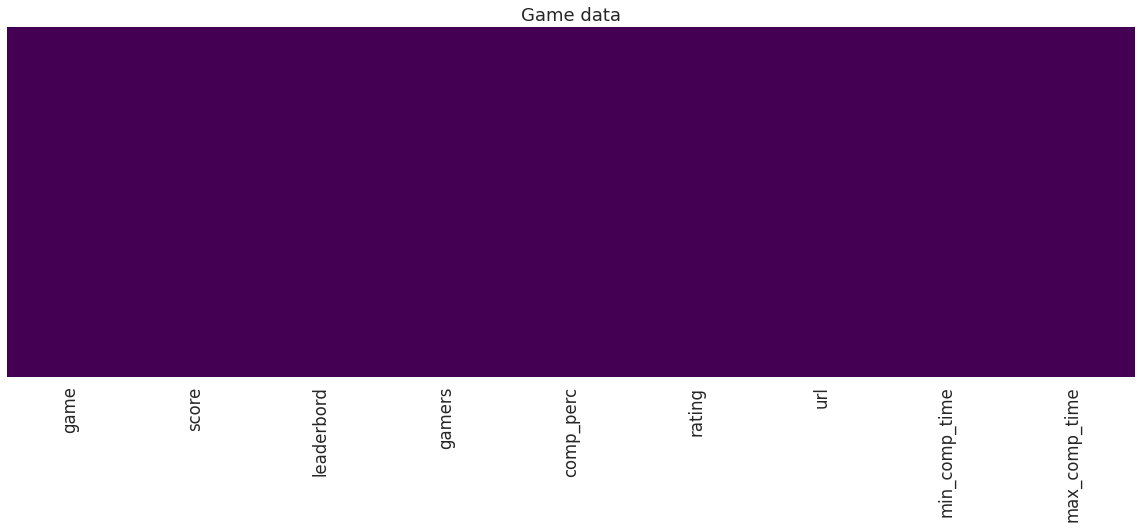

In [10]:
#shows null values 
fig, ax = plt.subplots( figsize = (18, 6))
sns.heatmap(game.isnull(), yticklabels=False, cbar=False ,cmap='viridis').set_title('Game data')


- The heatmap above shows us there is no null values in this dataset

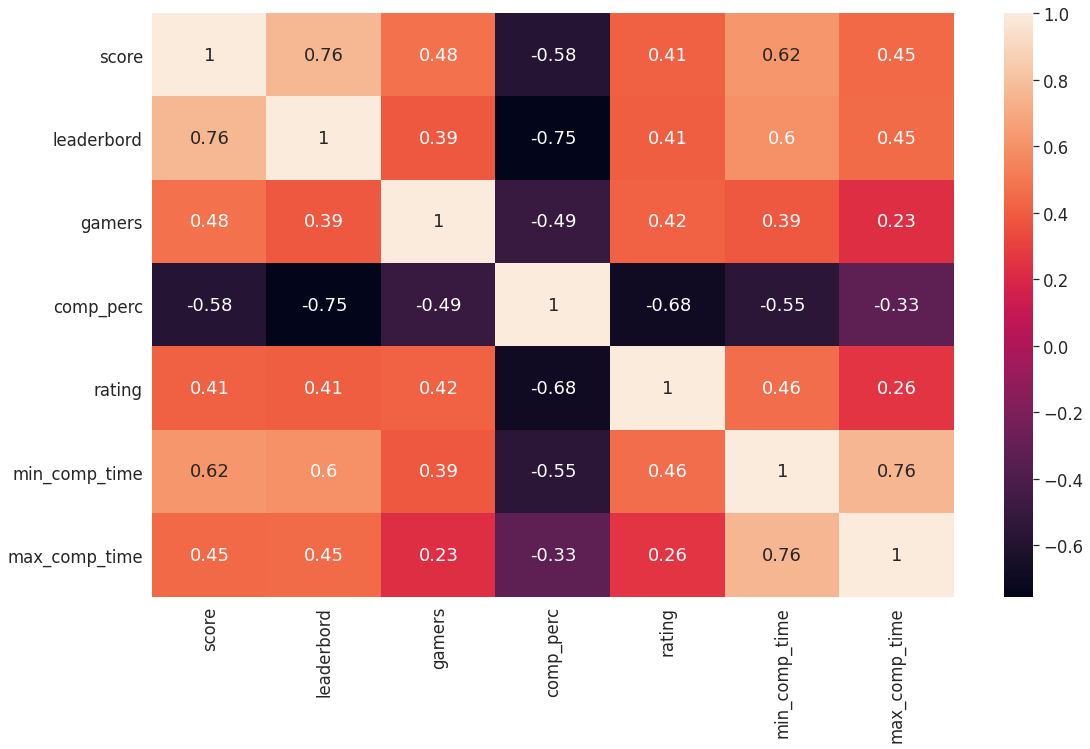

In [11]:
#heatmap to shows the correlation between featur
fig, ax7 = plt.subplots(figsize=(16,10))
game_correlations = game.corr();
sns.heatmap(game_correlations, annot=True,ax=ax7 );  

- The heatmap above shows us the correlation between features

In [12]:
#collect Numrical values to represnt features distrbution.
num_var = [f for f in game.columns if game.dtypes[f] != 'object']


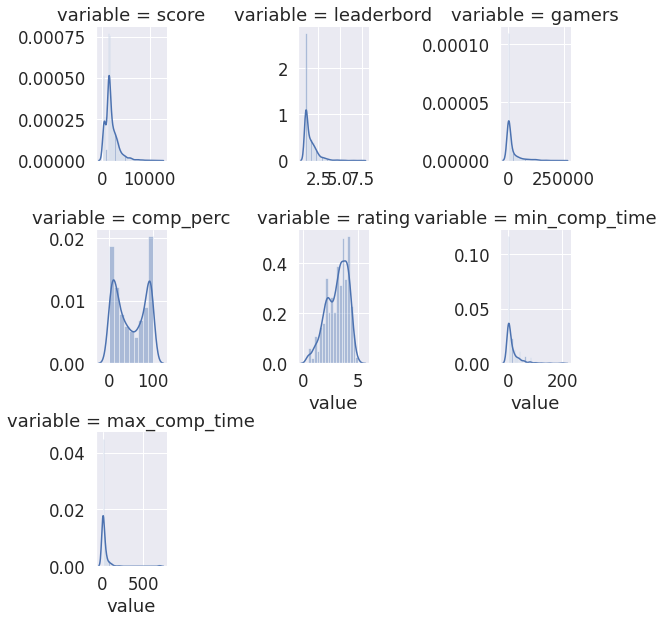

In [13]:
vn = pd.melt(game, value_vars=num_var)
fig = sns.FacetGrid(vn, col="variable",  col_wrap=3, sharex=False, sharey=False, palette='Set3') # we using FacetGrid 
fig = fig.map(sns.distplot, "value")
plt.show()

- The graph above shows us features distrbution.

- **Outliers detection:**

In [14]:
def var_standardized(v):
        stand= (v - v.mean()) / game.std()
        return stand


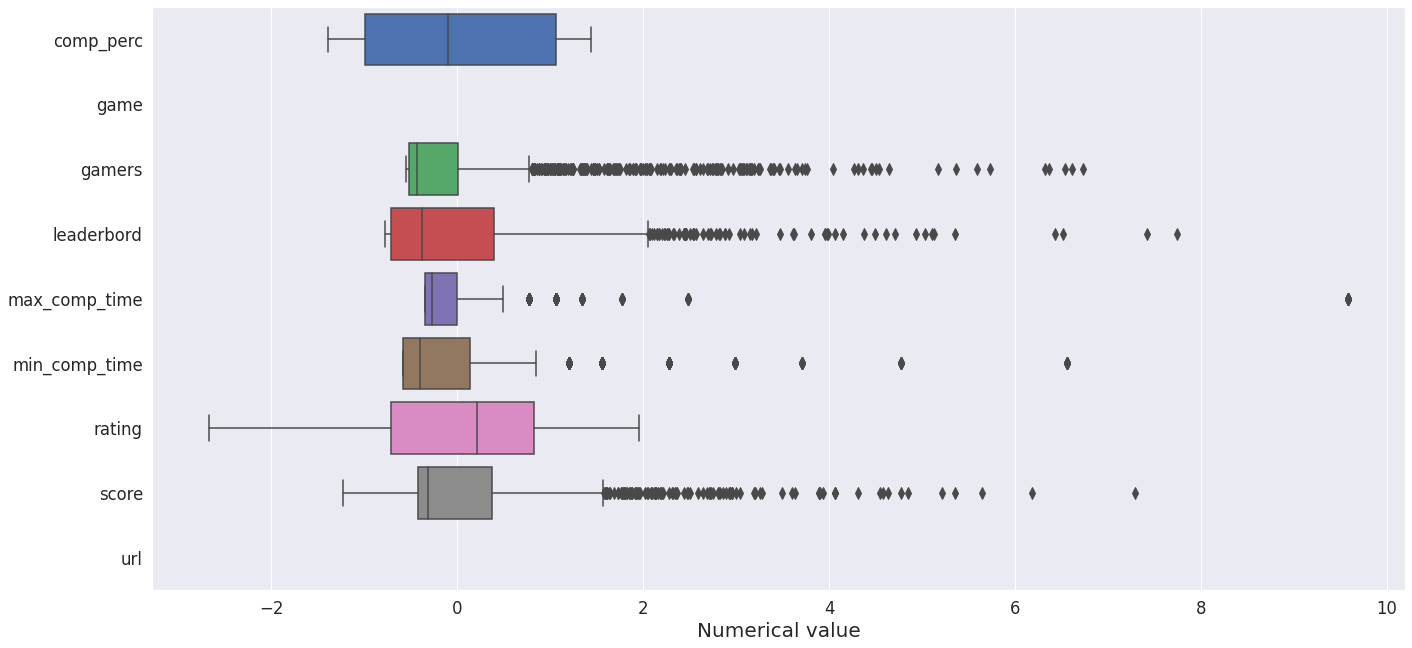

In [15]:
df_game = var_standardized(game)
fig, ax1 = plt.subplots(figsize=(20, 10))
sns.boxplot(data=df_game, orient='h', fliersize=8, linewidth=1.5, saturation=1.5, ax=ax1)
plt.xlabel('Numerical value', size=20);

- The graph above shows us the outliers each feature

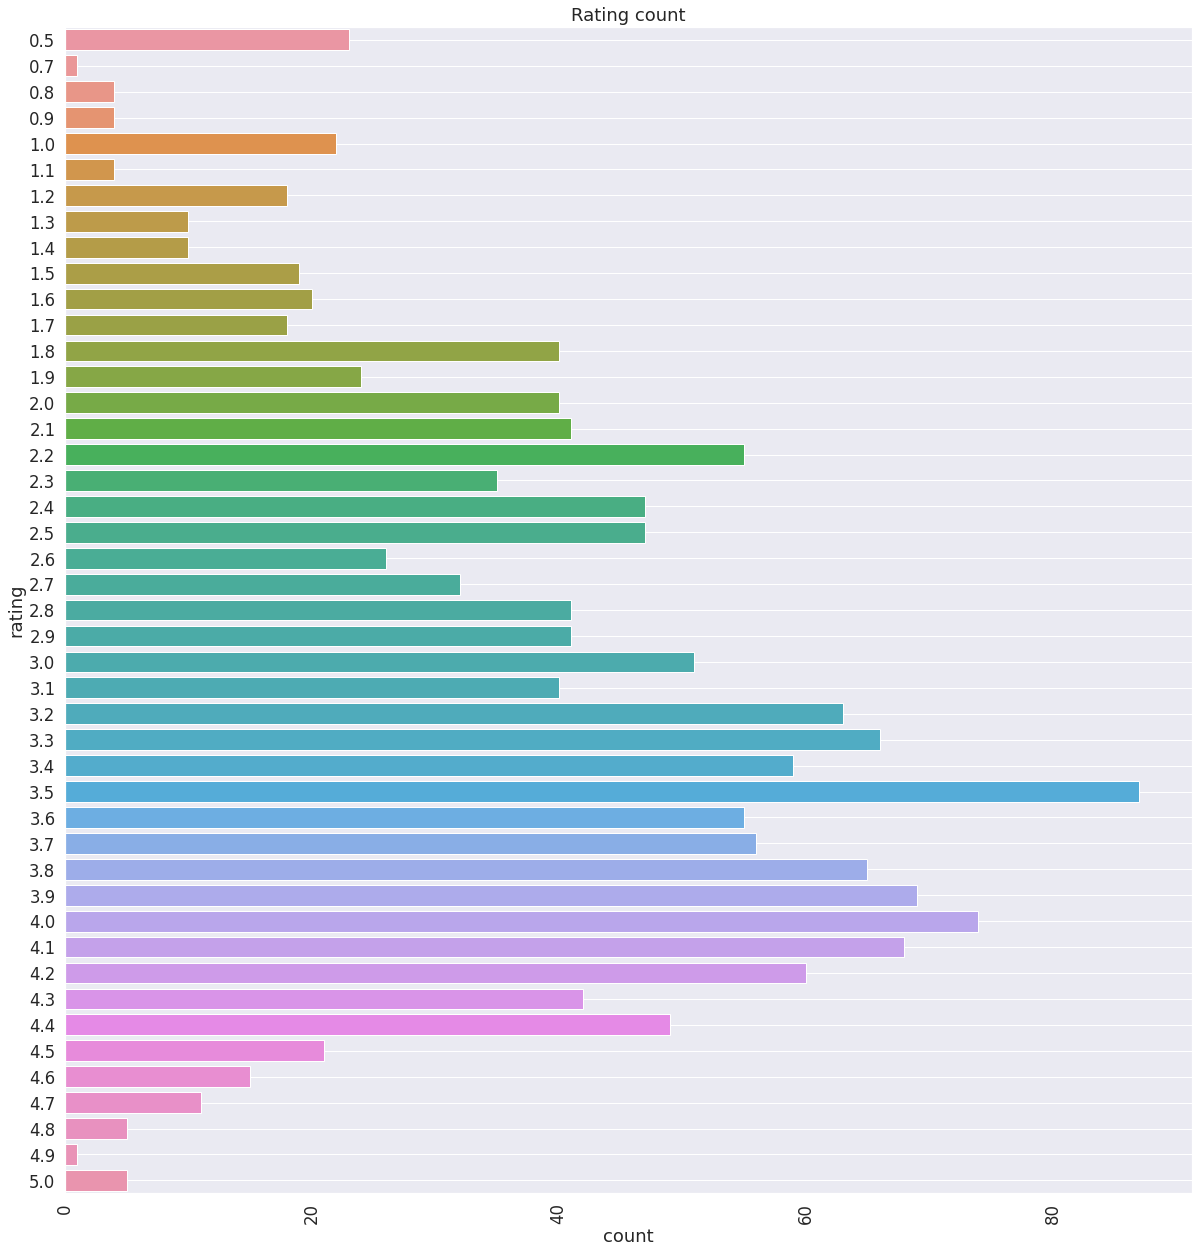

In [16]:
plt.figure(figsize=(18,20))
sns.countplot(y = game['rating'])
plt.title("Rating count")
plt.xticks(rotation=90)
plt.grid()
plt.show()

- The graph above shows us the distribution of rating in dataset

____________

### The relation between gamers and the ones who complete the game

- we want to show the relationship in scatter plot below between the number of all gamers who play a game and the number of gamers who complete the game so we create new column "comp_num" which is contains the number of gamers who complete the game and we get it by convert the comp_perc column that contains the precentage of gamers who complete the game using this equation :

                                      (game.comp_perc/100)*game.gamers
                                      


In [17]:
game['comp_num']= (game.comp_perc/100)*game.gamers
game['comp_num']=game['comp_num'].astype('int64')

In [18]:
game.head()

,game,score,leaderbord,gamers,comp_perc,rating,url,min_comp_time,max_comp_time,comp_num
0,A Boy and His Blob,638,2.02,2194,16.5,3.2,https://www.truetrophies.com/game/A-Boy-and-Hi...,15,20,362
1,A Hat in Time,1992,1.53,7062,35.9,4.2,https://www.truetrophies.com/game/A-Hat-in-Tim...,15,20,2535
2,A Hero and a Garden,1364,1.01,503,97.6,5.0,https://www.truetrophies.com/game/A-Hero-and-a...,0,1,490
3,A Hero and a Garden (EU),1363,1.01,581,97.8,2.9,https://www.truetrophies.com/game/A-Hero-and-a...,0,1,568
4,A King's Tale: Final Fantasy XV,637,2.02,21914,14.1,3.3,https://www.truetrophies.com/game/A-Kings-Tale...,4,5,3089


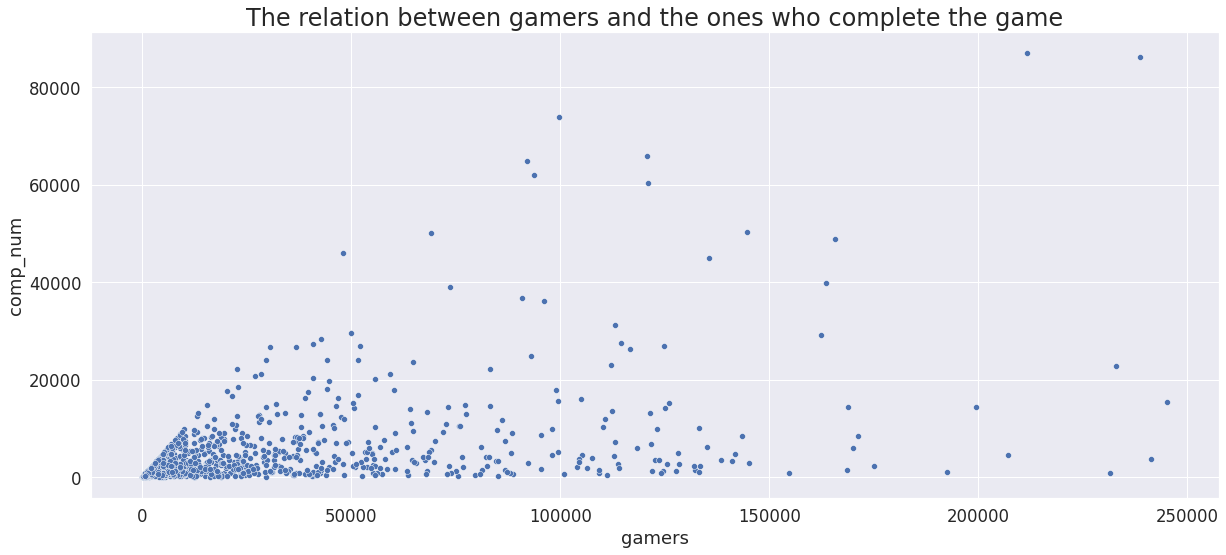

In [19]:
plt.figure(figsize=(18,8));
sns.scatterplot(data=game, x='gamers', y='comp_num')
plt.title('The relation between gamers and the ones who complete the game', fontsize=24)
plt.show()

- The scatter shows us the relation between gamers and the ones who complete the game, we can say a few numbers of gamers who complete the game

## Step 5:  Modeling

-  We are building a Content-Based Recommender Systems for video games by using two algorithms which are:
    - Nearest Neighbors .
    - K-Neighbors Classifier.

- **Splitting the dataset into 80/20 train/test data for the model:**

In [20]:
split_value = int(len(game) * 0.80)
train = game[:split_value]
test = game[split_value:]

In [21]:
len(train),len(test)

(1267, 317)

In [22]:
#Choosing feature columns for recommender system : 
X = train.iloc[:, [3,4, 5,7,8 ]].values
y = test.iloc[:, [3,4, 5,7,8 ]].values



In [23]:
#Scalling the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs_train = ss.fit_transform(X)
Xs_test=ss.transform(y)


## Nearest Neighbors Model : 

In [24]:
nn = NearestNeighbors(metric='cosine',n_neighbors=1).fit(Xs_train)
distances, indices=nn.kneighbors(Xs_test)
dic={}
l1=[]
l2=[]
for i in indices:
       l1.append(i.item())#to add all "id" of games  in list 1
       l2.append(train['game'][i].iloc[0])#to add "name" of games in list 2

#Adding id list and name of games list to dictionary
dic['id']=l1
dic['recommnded_game']=l2
      


In [25]:
#Create new DataFrame to present the recommnder game for the original game  
recommend_games=pd.DataFrame.from_dict(dic)
recommend_games["original_game"] = test['game'].values
recommend_games

,id,recommnded_game,original_game
0,1174,Sky Force Anniversary,Super Time Force Ultra
1,45,Active Soccer 2 DX (EU),Super Toy Cars
2,592,Gravity Duck (EU),Super Weekend Mode
3,867,Mochi Mochi Boy (Asia),Super Weekend Mode (Asia)
4,844,Midnight Deluxe,Super Weekend Mode (EU)
...,...,...,...
312,429,Dream C Club: HostGirls On Stage,36 Fragments of Midnight
313,104,Arcade Archives Ninja-Kid,36 Fragments of Midnight (Asia)
314,287,Coffin Dodgers,36 Fragments of Midnight (EU)
315,1006,Phoenix Wright: Ace Attorney Trilogy,428: Shibuya Scramble


### Evaluating

- we will evaluate based on the first row :

  - original game = Super Time Force Ultra
  - the Recommended games = Sky Force Anniversary
  
And all of them are having similar categories: Action and Shooting game


## We implement Nearest Neighbors Model as function 

In [26]:
def recommendation(g_name):

 for i in test.game:
    if g_name == i:
      idx=test[test['game']==g_name].index.values.astype(int)[0]
      
      y = test.iloc[idx, [4, 5,6,8,9 ]].values
      X = train.iloc[:, [3,4, 5,7,8 ]].values
      #Scalling the data
      from sklearn.preprocessing import StandardScaler
      ss = StandardScaler()
      Xs_train = ss.fit_transform(X)
      Xs_test=ss.transform(y.reshape(1, -1))
      nn = NearestNeighbors(metric='cosine',n_neighbors=1).fit(Xs_train)
      distances, indices=nn.kneighbors(Xs_test)
      dic={}
      l1=[]
      l2=[]
      for i in indices:
            l1.append(i.item())#to add all "id" of games  in list 1
            l2.append(train['game'][i].iloc[0])#to add "name" of games in list 2
      #Adding id list and name of games list to dictionary
      dic['id']=l1
      dic['recommnded_game']=l2
      #Create new DataFrame to present the recommnder game for the original game  
      recommend_games=pd.DataFrame.from_dict(dic)
      recommend_games["original_game"] = test['game'].iloc[idx]
      return recommend_games


In [27]:
test = game[split_value:].reset_index()

#we use random library to print random games that a user choose from it

from random import sample

# get 5 random rows from dataframe
rindex =  np.array(sample(range(len(test)), 5))

random_games = pd.DataFrame(test['game'].iloc[rindex])
print(random_games)

#we take input from the user and print the recommended game for it
x = input('\nChoose Game Name from the list above:\n')
recomendedG_df=recommendation(x)
recomendedG_df


                              game
53                     The Complex
185  Trine 4: The Nightmare Prince
211                     Until Dawn
48   The Binding of Isaac: Rebirth
255  Wonder Boy: The Dragon's Trap

Choose Game Name from the list above:
Until Dawn


,id,recommnded_game,original_game
0,1057,Ratchet & Clank,Until Dawn


________

## K-Neighbors Classifier Model : 

- **Splitting the dataset into 50/50 train/test data for the model:**

In [28]:
split_value = int(len(game) * 0.50)
train = game[:split_value]
test = game[split_value:]

In [29]:
#Choosing feature columns for recommender system :
X = train.iloc[:, [3,7,8 ]].values
y = test.iloc[:, [3,7,8 ]].values




In [30]:
from sklearn.neighbors import KNeighborsClassifier

#initializing KNeighborsClassifier model with three neighbors in order to present three recommnded games for original game
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
distances, indices=knn.kneighbors(y)


In [31]:
dic={}
id_list=[]
recommend1=[]
recommend2=[]
recommend3=[]

for i in indices:
        recommend1.append(train['game'][i[0]])#to add the first recommnded game for the original game in list1 
        recommend2.append(train['game'][i[1]])#to add the second recommnded game for the original game in list1 
        recommend3.append(train['game'][i[2]])#to add the third recommnded game for the original game in list1 

        
        
#Adding the lists of recommnded game to dictionary
dic['Recommended_game_1']=recommend1
dic['Recommended_game_2']=recommend2
dic['Recommended_game_3']=recommend3



In [32]:
#Create new DataFrame to present all the recommnded games for the original game  
recommend_games=pd.DataFrame.from_dict(dic)
recommend_games["original_game"] = test['game'].values
recommend_games

,Recommended_game_1,Recommended_game_2,Recommended_game_3,original_game
0,Energy Balance,Gun Crazy,Arcade Archives Contra,Lost Grimoires 2: Shard of Mystery
1,A Winter's Daydream (EU),Jack N' Jill DX (Asia),InkSplosion (Asia),Lost Grimoires: Stolen Kingdom
2,Arcade Archives Atomic Robo-Kid,BFF or Die,ACA NEOGEO SHOCK TROOPERS,Lost Wing (EU)
3,Deadpool,Bastion,Bully,Lovers in a Dangerous Spacetime
4,ACT IT OUT! A Game of Charades,Access Denied,Chaos on Deponia (EU),Machinarium
...,...,...,...,...
787,ARCADE GAME SERIES: Ms. PAC-MAN,Energy Cycle (EU),Aragami,36 Fragments of Midnight
788,Gun Crazy (EU),FullBlast (Asia),Lethal VR,36 Fragments of Midnight (Asia)
789,DOOM VFR,GUNS UP!,Assassin's Creed Chronicles: China,36 Fragments of Midnight (EU)
790,CRYSTAR,Active Soccer 2 DX (EU),Baseball Riot,428: Shibuya Scramble


### Evaluating

- we will evaluate based on the first row :

  - original game = Lost Grimoires 2: Shard of Mystery
  - the Recommended games = Energy Balance , Gun Crazy, Arcade Archives Contra

And all of them are having similar categories: Adventure, Casual, Puzzle and violance


_______

## Conclusion-and-Recommendations :

In this project we built a Content-based recommender system based on games and the similarities between them. we implement two algorithms the first one is Nearest Neighbors which is unsupervised machine learning algorithm. The second one is K-Neighbors Classifier which is supervised algorithm. we didn't use metric to measure the performance since most recommenation system evaluates on how close a recommender from the original point.
 
 